# Lithium plating in PyBaMM

In [1]:
import pybamm
import matplotlib.pyplot as plt


In [2]:
model = pybamm.lithium_ion.DFN(options={"lithium plating": "partially reversible"})


In [3]:
params = pybamm.ParameterValues("OKane2022")


In [4]:
n_cycle = 5
experiment = pybamm.Experiment(
    [
        ("Charge at 1C until 4.2 V",
        "Rest for 15 hour",
        "Discharge at C/20 until 2.5 V"),
    ]*n_cycle
)

In [5]:
sim = pybamm.Simulation(model, parameter_values = params, experiment = experiment)

In [6]:
sol = sim.solve()
pybamm.dynamic_plot(sol, ["Current [A]", "Terminal voltage [V]"])

interactive(children=(FloatSlider(value=0.0, description='t', max=153.85626069522428, step=1.538562606952243),…

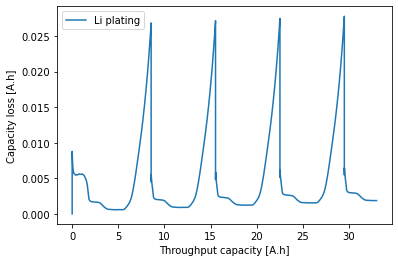

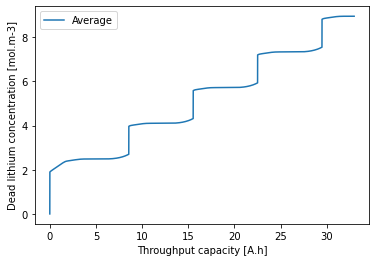

<Figure size 432x288 with 0 Axes>

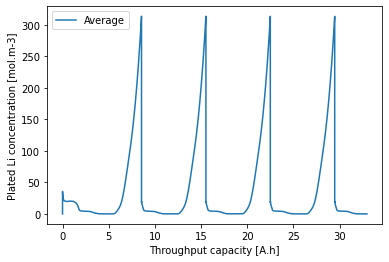

In [7]:
Qt = sol["Throughput capacity [A.h]"].entries
Q_plating = sol["Loss of capacity to lithium plating [A.h]"].entries

plt.figure()
plt.plot(Qt,Q_plating,label="Li plating")
plt.xlabel("Throughput capacity [A.h]")
plt.ylabel("Capacity loss [A.h]")
plt.legend()
plt.show()

plt.figure()
Dead = sol["Dead lithium concentration [mol.m-3]"].entries[-1,:]

plt.plot(Qt,Dead,label="Average")
plt.xlabel("Throughput capacity [A.h]")
plt.ylabel("Dead lithium concentration [mol.m-3]")
plt.legend()
plt.show()  

plt.figure()
C_Li = sol["Lithium plating concentration [mol.m-3]"].entries[-1,:]
plt.figure()
plt.plot(Qt,C_Li,label="Average")
plt.xlabel("Throughput capacity [A.h]")
plt.ylabel("Plated Li concentration [mol.m-3]")
plt.legend()
plt.show() 

In [8]:
pybamm.__version__

'23.5'